# 판다스 라이브러리 임포트

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, roc_auc_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



# Train dataset, Test dataset 불러오기

In [3]:
# 1. 데이터 불러오기 및 데이터 확인
df= pd.read_csv("C:\\ML_Project\\train.csv")
df.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

target = "허위매물여부"


df["게재일"] = pd.to_datetime(df["게재일"], errors="coerce")


X = df.drop(columns=[target]).copy()
y = df[target].copy()


# y_train: 훈련 타겟, y_valid: 검증 타겟
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Train dataset

In [5]:
# train 데이터셋 상위 5개 행만 확인
X_train.head(5)


,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일
55,TRAIN_0055,전화확인,172000000.0,580000,27.16,2.0,5.0,북향,1.0,1.0,불가능,31.0,4,G52Iz8V2B9,A플랫폼,2025-03-02
564,TRAIN_0564,현장확인,20500000.0,370000,44.69,10.0,14.0,남향,1.0,1.0,불가능,10.0,3,G52Iz8V2B9,A플랫폼,2023-09-10
820,TRAIN_0820,전화확인,393000000.0,250000,NaN,2.0,3.0,동향,2.0,1.0,불가능,NaN,0,N00fb8Z9A4,D플랫폼,2024-10-07
2395,TRAIN_2395,현장확인,365000000.0,330000,35.30,1.0,6.0,남서향,1.0,1.0,불가능,39.0,5,G52Iz8V2B9,E플랫폼,2023-09-28
1809,TRAIN_1809,전화확인,139500000.0,120000,17.50,7.0,8.0,서향,1.0,1.0,불가능,45.0,3,G52Iz8V2B9,A플랫폼,2024-07-31


In [6]:
# train 데이터셋 상위 10개 행만 확인
X_train.head(10)

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일
55,TRAIN_0055,전화확인,172000000.0,580000,27.16,2.0,5.0,북향,1.0,1.0,불가능,31.0,4,G52Iz8V2B9,A플랫폼,2025-03-02
564,TRAIN_0564,현장확인,20500000.0,370000,44.69,10.0,14.0,남향,1.0,1.0,불가능,10.0,3,G52Iz8V2B9,A플랫폼,2023-09-10
820,TRAIN_0820,전화확인,393000000.0,250000,NaN,2.0,3.0,동향,2.0,1.0,불가능,NaN,0,N00fb8Z9A4,D플랫폼,2024-10-07
2395,TRAIN_2395,현장확인,365000000.0,330000,35.30,1.0,6.0,남서향,1.0,1.0,불가능,39.0,5,G52Iz8V2B9,E플랫폼,2023-09-28
1809,TRAIN_1809,전화확인,139500000.0,120000,17.50,7.0,8.0,서향,1.0,1.0,불가능,45.0,3,G52Iz8V2B9,A플랫폼,2024-07-31
1714,TRAIN_1714,현장확인,171000000.0,150000,18.63,4.0,17.0,동향,1.0,1.0,불가능,36.0,0,G52Iz8V2B9,B플랫폼,2023-10-23
1563,TRAIN_1563,현장확인,321500000.0,660000,17.50,5.0,11.0,남동향,1.0,1.0,가능,NaN,11,C41wx1K6U9,B플랫폼,2024-10-08
1903,TRAIN_1903,현장확인,22500000.0,60000,NaN,2.0,3.0,남동향,2.0,1.0,불가능,NaN,0,U93ap2F8Z1,C플랫폼,2024-12-22
329,TRAIN_0329,현장확인,122500000.0,200000,17.50,10.0,12.0,서향,1.0,1.0,가능,26.0,9,G52Iz8V2B9,A플랫폼,2024-12-09
1811,TRAIN_1811,현장확인,369000000.0,400000,24.01,NaN,10.0,남서향,2.0,1.0,가능,8.0,4,r82ax9M3U3,B플랫폼,2024-08-24


In [7]:
# train 데이터셋 하위 5개 행만 확인
X_valid.tail(5)

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일
1194,TRAIN_1194,현장확인,155500000.0,60000,29.84,9.0,10.0,동향,2.0,1.0,가능,34.0,14,W16wO7Z4R5,C플랫폼,2024-12-04
1915,TRAIN_1915,현장확인,127000000.0,450000,19.83,2.0,6.0,동향,1.0,1.0,불가능,3.0,8,j79Xs5I3K0,A플랫폼,2024-02-10
2326,TRAIN_2326,서류확인,132000000.0,450000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,a42kL7A7L6,A플랫폼,2024-12-16
1382,TRAIN_1382,현장확인,191500000.0,160000,17.50,NaN,16.0,남향,1.0,1.0,불가능,NaN,9,Q42YF3Y0I2,A플랫폼,2024-09-14
541,TRAIN_0541,현장확인,21000000.0,220000,27.96,18.0,19.0,서향,1.0,1.0,불가능,19.0,3,G52Iz8V2B9,A플랫폼,2024-06-24


## ID 열 제거

In [8]:
# 분석에 필요없는 열 제거
X_train = X_train.drop('ID',axis=1)
X_valid= X_valid.drop('ID',axis=1)

## 열 확인

In [9]:
print(X_train.columns)
print(X_valid.columns)

Index(['매물확인방식', '보증금', '월세', '전용면적', '해당층', '총층', '방향', '방수', '욕실수', '주차가능여부',
       '총주차대수', '관리비', '중개사무소', '제공플랫폼', '게재일'],
      dtype='str')
Index(['매물확인방식', '보증금', '월세', '전용면적', '해당층', '총층', '방향', '방수', '욕실수', '주차가능여부',
       '총주차대수', '관리비', '중개사무소', '제공플랫폼', '게재일'],
      dtype='str')


## 데이터 구조 확인하기

In [10]:
# 데이터의 행과 열의 개수를 알 수 있음
print('데이터 모양')
print(X_train.shape)

# 데이터 타입, 개수 등 정보를 알 수 있음
print('데이터 정보')
print(X_train.info())

# 매물확인방식, 방향, 주차가능여부, 중개사무소, 제공플랫폼, 게재일 변수는 숫자형 데이터가 아님을 확인 할 수 있음.

데이터 모양
(1961, 15)
데이터 정보
<class 'pandas.DataFrame'>
Index: 1961 entries, 55 to 922
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   매물확인방식  1961 non-null   str           
 1   보증금     1961 non-null   float64       
 2   월세      1961 non-null   int64         
 3   전용면적    1319 non-null   float64       
 4   해당층     1780 non-null   float64       
 5   총층      1945 non-null   float64       
 6   방향      1961 non-null   str           
 7   방수      1945 non-null   float64       
 8   욕실수     1943 non-null   float64       
 9   주차가능여부  1961 non-null   str           
 10  총주차대수   1383 non-null   float64       
 11  관리비     1961 non-null   int64         
 12  중개사무소   1961 non-null   str           
 13  제공플랫폼   1961 non-null   str           
 14  게재일     1961 non-null   datetime64[us]
dtypes: datetime64[us](1), float64(7), int64(2), str(5)
memory usage: 245.1 KB
None


## 게재일 날짜형으로 변환

In [11]:
# 날짜형 변환
X_train['게재일'] = pd.to_datetime(X_train['게재일'])
X_valid['게재일']= pd.to_datetime(X_valid['게재일'])

## 타겟 분포 확인하기

In [12]:
# 허위매물여부 클래스별 개수와 비율 확인
target_counts = y.value_counts()
target_ratio = y.value_counts(normalize= True) 

print("클래스별 개수:\n", target_counts)
print("\n클래스별 비율:\n", target_ratio.round(3))

# 허위매물여부가 0인 데이터가 더 많으므로 불균형 데이터셋임을 알 수 있음.

클래스별 개수:
 허위매물여부
0    2154
1     298
Name: count, dtype: int64

클래스별 비율:
 허위매물여부
0    0.878
1    0.122
Name: proportion, dtype: float64


## 결측치 확인하기

In [13]:
print(X_train.isnull().sum())
# 전체 데이터 2452개 중 전용면적과 총 주차대수의 결측이 상당히 많다는 것을 알 수 있음.
# 또한 수치형 변수만 결측치가 존재함을 알 수 있음.

매물확인방식      0
보증금         0
월세          0
전용면적      642
해당층       181
총층         16
방향          0
방수         16
욕실수        18
주차가능여부      0
총주차대수     578
관리비         0
중개사무소       0
제공플랫폼       0
게재일         0
dtype: int64


## 기초 통계량 확인하기

In [14]:
X_train.describe()

# 수치형 변수 중 방수와 욕실수 변수는 1과 2로만 이루어짐
## 욕실수의 평균은 1.03으로 대부분이 1개임을 알 수 있음.

# 월세 최소값이 0인 데이터가 존재함을 알 수 있음

,보증금,월세,전용면적,해당층,총층,방수,욕실수,총주차대수,관리비,게재일
count,1.961000e+03,1961.000000,1319.000000,1780.000000,1945.000000,1945.000000,1943.000000,1383.000000,1961.000000,1961
mean,1.561917e+08,379974.502805,27.137574,4.756180,7.967095,1.383033,1.033968,19.936370,5.374299,2024-08-05 01:26:38.980112
min,5.000000e+06,0.000000,17.500000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,2023-04-28 00:00:00
25%,7.350000e+07,200000.000000,19.830000,2.000000,4.000000,1.000000,1.000000,4.000000,0.000000,2024-05-23 00:00:00
50%,1.315000e+08,380000.000000,26.440000,4.000000,6.000000,1.000000,1.000000,10.000000,5.000000,2024-09-19 00:00:00
75%,1.885000e+08,550000.000000,32.365000,6.000000,10.000000,2.000000,1.000000,30.500000,9.000000,2024-11-13 00:00:00
max,4.090000e+08,750000.000000,49.970000,21.000000,21.000000,2.000000,2.000000,590.000000,96.000000,2025-03-03 00:00:00
std,1.212142e+08,205963.017689,8.001038,3.477559,4.880986,0.486251,0.181194,28.574684,5.699502,NaN


In [15]:
# 월세가 0인 데이터만 뽑기
train_월세0 = X_train[X_train["월세"]==0]
train_월세0

# 월세가 0인 데이터는 모두 허위매물임을 알 수 있음

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일
188,현장확인,5000000.0,0,NaN,4.0,4.0,동향,1.0,1.0,불가능,1.0,9,Z18up3D1C3,A플랫폼,2024-08-27
725,서류확인,364000000.0,0,17.50,10.0,16.0,북동향,1.0,1.0,가능,34.0,0,R17wi5N4M8,D플랫폼,2024-05-19
809,현장확인,108500000.0,0,18.87,NaN,16.0,동향,1.0,1.0,가능,54.0,0,G38pb6B9C7,C플랫폼,2024-07-16
1305,현장확인,18000000.0,0,17.50,NaN,17.0,남동향,1.0,1.0,가능,99.0,0,y86qM5T6T6,A플랫폼,2024-05-16


## 결측치 채우기

In [16]:
# 전용면적은 연속형 수치이므로 중앙값으로 대체
imp_area = SimpleImputer(strategy='median')
X_train[['전용면적']] = imp_area.fit_transform(X_train[['전용면적']])
X_valid[['전용면적']]  = imp_area.transform(X_valid[['전용면적']])


# 총주차대수는 0으로 대체
X_train['총주차대수'] = X_train['총주차대수'].fillna(0)
X_valid['총주차대수'] = X_valid['총주차대수'].fillna(0)

# 나머지는 최빈값으로 대체
mode_cols=['해당층','총층','방수','욕실수']

imp_mode=SimpleImputer(strategy='most_frequent')
X_train[mode_cols]=imp_mode.fit_transform(X_train[mode_cols])
X_valid[mode_cols]=imp_mode.transform(X_valid[mode_cols])

print("처리 후 train 결측값 수: ", X_train.isnull().sum().sum())
print("처리 후 test 결측값 수: ", X_valid.isnull().sum().sum())

처리 후 train 결측값 수:  0
처리 후 test 결측값 수:  0


In [17]:
# 제대로 결측값이 대치되었는지 상위 10개 행으로 확인
X_train.head(10)

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일
55,전화확인,172000000.0,580000,27.16,2.0,5.0,북향,1.0,1.0,불가능,31.0,4,G52Iz8V2B9,A플랫폼,2025-03-02
564,현장확인,20500000.0,370000,44.69,10.0,14.0,남향,1.0,1.0,불가능,10.0,3,G52Iz8V2B9,A플랫폼,2023-09-10
820,전화확인,393000000.0,250000,26.44,2.0,3.0,동향,2.0,1.0,불가능,0.0,0,N00fb8Z9A4,D플랫폼,2024-10-07
2395,현장확인,365000000.0,330000,35.30,1.0,6.0,남서향,1.0,1.0,불가능,39.0,5,G52Iz8V2B9,E플랫폼,2023-09-28
1809,전화확인,139500000.0,120000,17.50,7.0,8.0,서향,1.0,1.0,불가능,45.0,3,G52Iz8V2B9,A플랫폼,2024-07-31
1714,현장확인,171000000.0,150000,18.63,4.0,17.0,동향,1.0,1.0,불가능,36.0,0,G52Iz8V2B9,B플랫폼,2023-10-23
1563,현장확인,321500000.0,660000,17.50,5.0,11.0,남동향,1.0,1.0,가능,0.0,11,C41wx1K6U9,B플랫폼,2024-10-08
1903,현장확인,22500000.0,60000,26.44,2.0,3.0,남동향,2.0,1.0,불가능,0.0,0,U93ap2F8Z1,C플랫폼,2024-12-22
329,현장확인,122500000.0,200000,17.50,10.0,12.0,서향,1.0,1.0,가능,26.0,9,G52Iz8V2B9,A플랫폼,2024-12-09
1811,현장확인,369000000.0,400000,24.01,2.0,10.0,남서향,2.0,1.0,가능,8.0,4,r82ax9M3U3,B플랫폼,2024-08-24


## 범주형 변수 값 확인

In [18]:
# 매물확인방식은 3개의 값, 방향은 8개, 주차가능여부는 2개, 제공플랫폼은 13개, 중개사무소는 매우 다양한 값을 가짐을 알 수 있음.

In [19]:
X_train['매물확인방식'].value_counts()

매물확인방식
현장확인    1361
전화확인     306
서류확인     294
Name: count, dtype: int64

In [20]:
X_train['방향'].value_counts()

방향
남향     497
동향     476
서향     311
남동향    220
남서향    176
북향     159
북서향     62
북동향     60
Name: count, dtype: int64

In [21]:
X_train['주차가능여부'].value_counts()

주차가능여부
가능     990
불가능    971
Name: count, dtype: int64

In [22]:
X_train['제공플랫폼'].value_counts()

제공플랫폼
A플랫폼    765
B플랫폼    490
C플랫폼    279
D플랫폼    155
E플랫폼    106
G플랫폼     48
F플랫폼     43
H플랫폼     30
I플랫폼     18
J플랫폼     12
L플랫폼      7
K플랫폼      7
M플랫폼      1
Name: count, dtype: int64

In [23]:
X_train['중개사무소'].value_counts()

중개사무소
G52Iz8V2B9    629
r82ax9M3U3     34
J52gJ2E4T6     25
H90uE4C0W5     25
b87Td0W4Y3     23
             ... 
u84Ix5E8C2      1
u04Gp5J3R0      1
W48dL6O9G6      1
b28kw6L5Y4      1
O42Rj2E3H5      1
Name: count, Length: 262, dtype: int64

# 파생변수 만들기

In [24]:
# 게재일 변수에서 월과 일을 추출
X_train["month"]=X_train['게재일'].dt.month
X_train["day"]=X_train['게재일'].dt.day

X_valid["month"]=X_valid['게재일'].dt.month
X_valid["day"]=X_valid['게재일'].dt.day
#..
# day 변수를 초,중,말로 표현하기
bins=[0,10,20,31]
labels=["초","중","말"]
X_train["day"]=pd.cut(X_train["day"],bins=bins,labels=labels)
X_valid["day"]=pd.cut(X_valid["day"],bins=bins,labels=labels)

# month 변수를 분기로 표현하기

bins=[0,3,6,9,12]
labels=["1분기","2분기","3분기","4분기"]
X_train["month"]=pd.cut(X_train["month"],bins=bins,labels=labels)
X_valid["month"]=pd.cut(X_valid["month"],bins=bins,labels=labels)

#  게재일 변수 삭제하기
X_train.drop(columns=["게재일"], inplace=True)
X_valid.drop(columns=["게재일"], inplace=True)

# 1,2,3월 -> 1분기 , 4,5,6월 -> 2분기 , 7,8,9월 -> 3분기 , 10,11,12월 -> 4분기
# month - 1 을 3으로 나눈 몫에 1을 더하면 분기를 구할 수 있음.

# train["분기"]=((train["month"]-1)//3)+1

# 1,2,3,4,5,6월 -> 상반기(1반기) , 7,8,9,10,11,12월 -> 하반기(2반기)
# month - 1 을 6으로 나눈 몫에 1을 더하면 반기를 구할 수 있음.

# train["반기"]=((train["month"]-1)//6)+1



In [25]:
# 층 비율 변수 추가
X_train["층 비율"]=X_train["해당층"]/X_train["총층"]
X_valid["층 비율"]=X_valid["해당층"]/X_valid["총층"]

# 면적 대비 방수 & 욕실수 추가
X_train["면적 대비 방수"]= X_train["방수"]/X_train["전용면적"]
X_valid["면적 대비 욕실수"]= X_valid["욕실수"]/X_valid["전용면적"]

X_train["면적 대비 방수"]= X_train["방수"]/X_train["전용면적"]
X_valid["면적 대비 욕실수"]= X_valid["욕실수"]/X_valid["전용면적"]


In [26]:
X_train.head()

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,month,day,층 비율,면적 대비 방수
55,전화확인,172000000.0,580000,27.16,2.0,5.0,북향,1.0,1.0,불가능,31.0,4,G52Iz8V2B9,A플랫폼,1분기,초,0.400000,0.036819
564,현장확인,20500000.0,370000,44.69,10.0,14.0,남향,1.0,1.0,불가능,10.0,3,G52Iz8V2B9,A플랫폼,3분기,초,0.714286,0.022376
820,전화확인,393000000.0,250000,26.44,2.0,3.0,동향,2.0,1.0,불가능,0.0,0,N00fb8Z9A4,D플랫폼,4분기,초,0.666667,0.075643
2395,현장확인,365000000.0,330000,35.30,1.0,6.0,남서향,1.0,1.0,불가능,39.0,5,G52Iz8V2B9,E플랫폼,3분기,말,0.166667,0.028329
1809,전화확인,139500000.0,120000,17.50,7.0,8.0,서향,1.0,1.0,불가능,45.0,3,G52Iz8V2B9,A플랫폼,3분기,말,0.875000,0.057143


In [27]:
X_valid.head()

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,month,day,층 비율,면적 대비 욕실수
1641,현장확인,125000000.0,100000,29.79,5.0,7.0,동향,2.0,1.0,가능,8.0,0,R20Vy9K9I8,C플랫폼,3분기,초,0.714286,0.033568
439,현장확인,153500000.0,10000,30.12,1.0,15.0,동향,2.0,2.0,불가능,4.0,0,G52Iz8V2B9,B플랫폼,4분기,초,0.066667,0.066401
1713,전화확인,328000000.0,530000,25.42,2.0,3.0,남향,2.0,1.0,불가능,0.0,0,Q42YF3Y0I2,A플랫폼,3분기,중,0.666667,0.039339
1859,서류확인,27500000.0,720000,19.83,2.0,4.0,동향,1.0,1.0,가능,1.0,3,a15xR3G4V0,A플랫폼,1분기,초,0.500000,0.050429
2024,전화확인,171000000.0,60000,17.50,2.0,9.0,남서향,1.0,1.0,불가능,8.0,9,f41Wq8P7T9,A플랫폼,3분기,초,0.222222,0.057143


# 범주형 변수 인코딩

In [28]:
# 주차가능여부 변수의 경우 두 가지의 값을 0, 1로 변환
X_train["주차가능여부"]= X_train["주차가능여부"].map({"불가능":0,"가능":1})
X_valid["주차가능여부"]= X_valid["주차가능여부"].map({"불가능":0,"가능":1})

In [29]:

# 인코딩
from sklearn.preprocessing import LabelEncoder

# 범주형 변수 리스트 확인하기 그리고 범주형 변수 리스트 만들기
cat_cols=["매물확인방식","방향","주차가능여부","제공플랫폼","중개사무소","month","day"]
cat_cols

# 범주형 변수 인코딩(범주형 변수를 수치로 변환)
for col in cat_cols:
    le=LabelEncoder()
    X_train[col]=le.fit_transform(X_train[col].astype(str))+1

 
for col in cat_cols:
    le=LabelEncoder()
    X_valid[col]=le.fit_transform(X_valid[col].astype(str))+1 





In [30]:
# 인코딩이 잘 수행되었는지 확인
X_train.head()

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,month,day,층 비율,면적 대비 방수
55,2,172000000.0,580000,27.16,2.0,5.0,7,1.0,1.0,1,31.0,4,28,1,1,3,0.400000,0.036819
564,3,20500000.0,370000,44.69,10.0,14.0,3,1.0,1.0,1,10.0,3,28,1,3,3,0.714286,0.022376
820,2,393000000.0,250000,26.44,2.0,3.0,4,2.0,1.0,1,0.0,0,64,4,4,3,0.666667,0.075643
2395,3,365000000.0,330000,35.30,1.0,6.0,2,1.0,1.0,1,39.0,5,28,5,3,1,0.166667,0.028329
1809,2,139500000.0,120000,17.50,7.0,8.0,8,1.0,1.0,1,45.0,3,28,1,3,1,0.875000,0.057143


In [31]:
X_valid.head()

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,month,day,층 비율,면적 대비 욕실수
1641,3,125000000.0,100000,29.79,5.0,7.0,4,2.0,1.0,2,8.0,0,54,3,3,3,0.714286,0.033568
439,3,153500000.0,10000,30.12,1.0,15.0,4,2.0,2.0,1,4.0,0,17,2,4,3,0.066667,0.066401
1713,2,328000000.0,530000,25.42,2.0,3.0,3,2.0,1.0,1,0.0,0,51,1,3,2,0.666667,0.039339
1859,1,27500000.0,720000,19.83,2.0,4.0,4,1.0,1.0,2,1.0,3,91,1,1,3,0.500000,0.050429
2024,2,171000000.0,60000,17.50,2.0,9.0,2,1.0,1.0,1,8.0,9,101,1,3,3,0.222222,0.057143


# 상관계수

## 허위 매물 여부(타겟)와 상관계수

In [32]:
target = "허위매물여부"

# 숫자형 피처와 타겟을 합쳐서 상관 계산
train_num = pd.concat(
    [X_train.select_dtypes(include="number"), y_train.rename(target)],
    axis=1
)

corr_with_target = train_num.corr()[target].drop(target).sort_values(ascending=False)
corr_with_target


방향          0.162585
중개사무소       0.159307
관리비         0.138925
방수          0.043698
면적 대비 방수    0.042279
매물확인방식      0.032704
보증금         0.026099
월세          0.018626
층 비율        0.017929
day        -0.016490
제공플랫폼      -0.018164
전용면적       -0.020601
욕실수        -0.043384
해당층        -0.108824
총주차대수      -0.131936
총층         -0.141725
주차가능여부     -0.144151
month      -0.203119
Name: 허위매물여부, dtype: float64

## 변수 간 상관관계

c:\Users\gram\anaconda3\envs\mlbase\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\gram\anaconda3\envs\mlbase\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


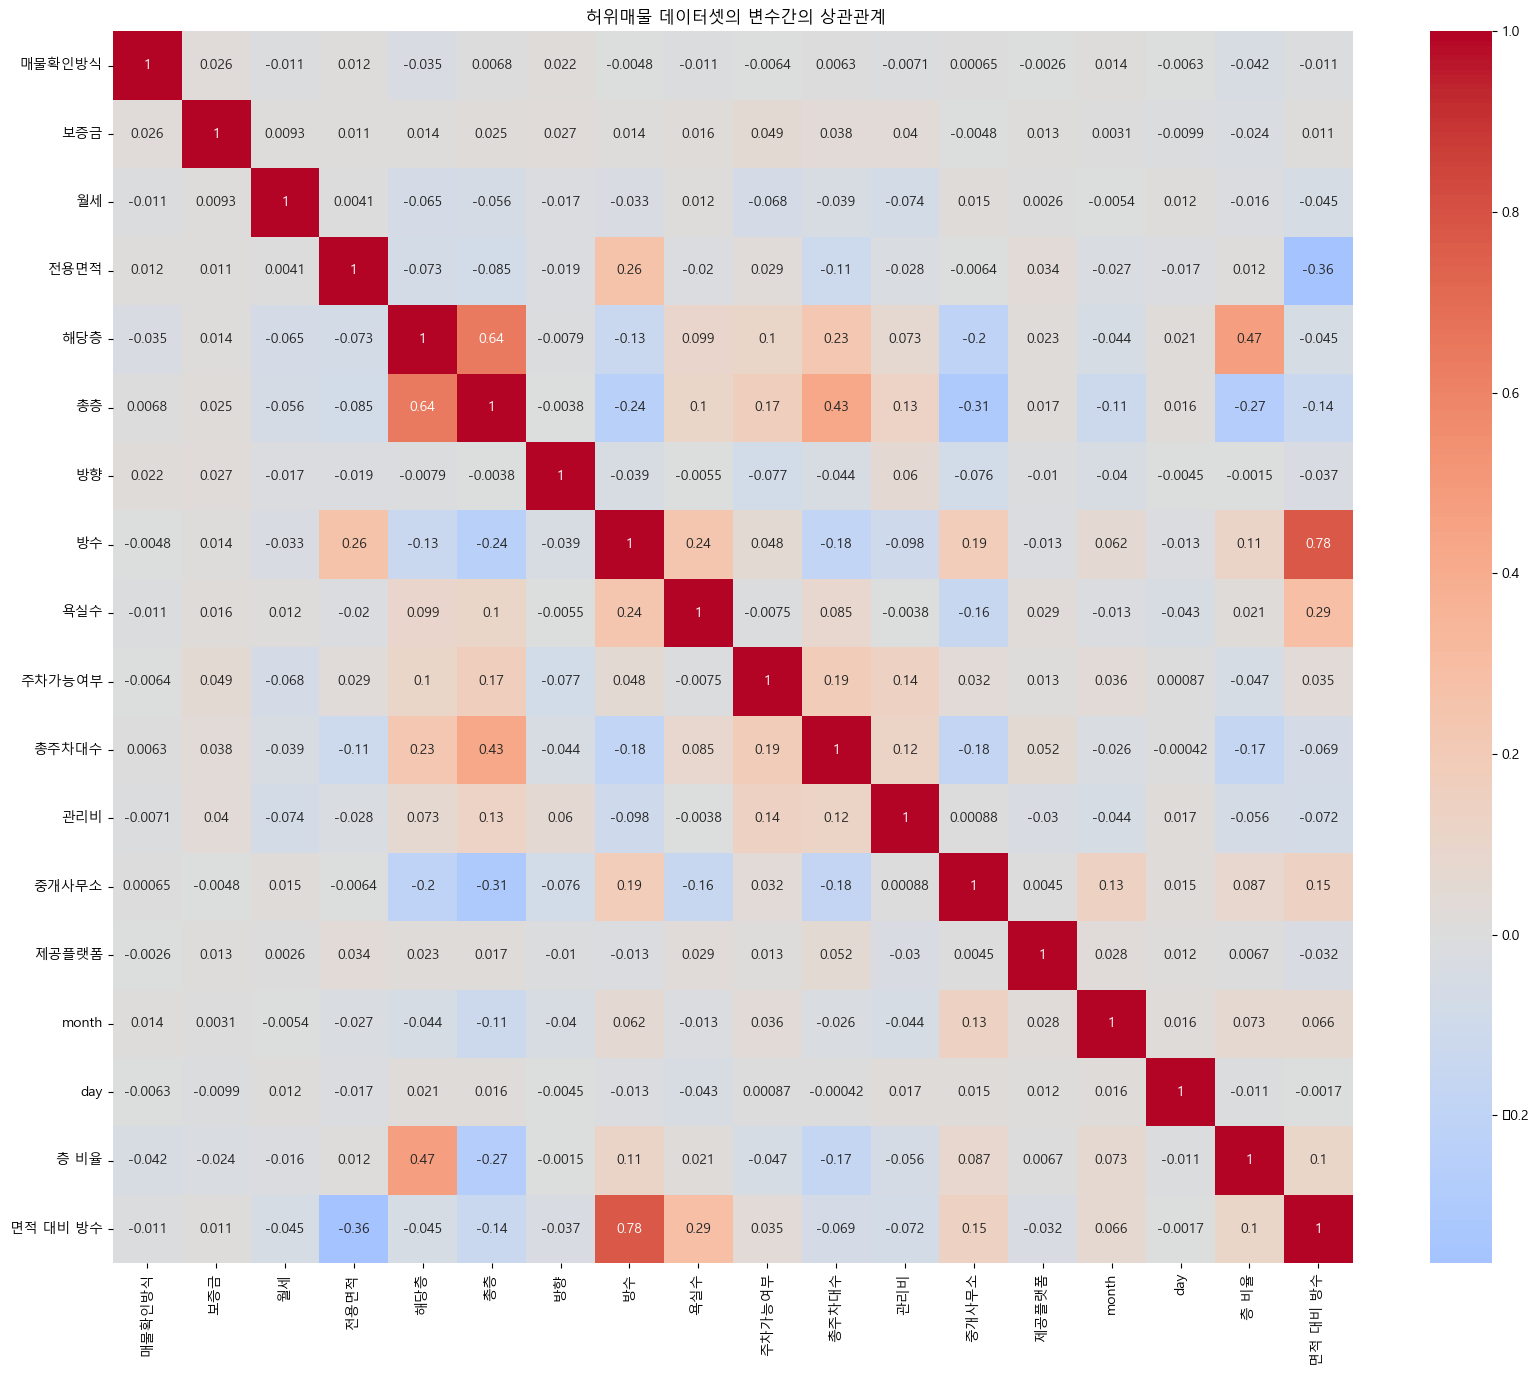

In [33]:
# 상관계수를 확인하기 위해 히트맵을 그리기
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정 (윈도우의 경우)

# 히트맵 생성
corr= X_train.select_dtypes(include="number").corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr,annot=True, cmap="coolwarm",center=0)
plt.title(" 허위매물 데이터셋의 변수간의 상관관계")
plt.show()

# 상관계수가 높은 변수 중 하나만 선택

In [34]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import numpy as np



# 피처 스케일링
scaler = StandardScaler()
X1_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index   # 인덱스 맞추기
)

X2_scaled= pd.DataFrame(
    scaler.fit_transform(X_valid),
    columns= X_valid.columns,
    index=X_valid.index
)


# 상수항 추가
X1_scaled = sm.add_constant(X1_scaled)
X2_scaled= sm.add_constant(X2_scaled)

# 로지스틱 회귀
logit_model = sm.Logit(y_train, X1_scaled)
results = logit_model.fit(method="bfgs", maxiter=100)
print(results.summary())

print()
print()
print()

logit_model = sm.Logit(y_valid, X2_scaled)
results = logit_model.fit(method="bfgs", maxiter=100)
print(results.summary())



Optimization terminated successfully.
         Current function value: 0.282975
         Iterations: 70
         Function evaluations: 71
         Gradient evaluations: 71
                           Logit Regression Results                           
Dep. Variable:                 허위매물여부   No. Observations:                 1961
Model:                          Logit   Df Residuals:                     1942
Method:                           MLE   Df Model:                           18
Date:                Wed, 25 Feb 2026   Pseudo R-squ.:                  0.2345
Time:                        13:44:53   Log-Likelihood:                -554.91
converged:                       True   LL-Null:                       -724.86
Covariance Type:            nonrobust   LLR p-value:                 2.819e-61
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7532      0.122    -2

In [35]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

# 검증셋 예측
y_valid_proba = results.predict(X2_scaled)     
y_valid_proba = np.ravel(y_valid_proba)
y_valid_pred = (y_valid_proba >= 0.5).astype(int)

# 결과 DataFrame
result_df = X_valid.copy()
result_df[target] = y_valid.values
result_df["예측확률"] = y_valid_proba
result_df["예측라벨"] = y_valid_pred

print("\n[검증셋 예측 결과 일부]")
show_cols = [target, "예측확률", "예측라벨"]
if "ID" in result_df.columns:
    show_cols = ["ID"] + show_cols
print(result_df[show_cols].head())

# 성능평가
print("\n[Validation Metrics]")
print("Accuracy :", round(accuracy_score(y_valid, y_valid_pred), 4))
print("Precision:", round(precision_score(y_valid, y_valid_pred, zero_division=0), 4))
print("Recall   :", round(recall_score(y_valid, y_valid_pred, zero_division=0), 4))
print("F1-score :", round(f1_score(y_valid, y_valid_pred, zero_division=0), 4))
print("ROC-AUC  :", round(roc_auc_score(y_valid, y_valid_proba), 4))

print("\n[Confusion Matrix]")
print(confusion_matrix(y_valid, y_valid_pred))

print("\n[Classification Report]")
print(classification_report(y_valid, y_valid_pred, digits=4))



[검증셋 예측 결과 일부]
      허위매물여부          예측확률  예측라벨
1641       0  2.721676e-02     0
439        0  1.887907e-11     0
1713       0  5.277882e-02     0
1859       0  3.793912e-01     0
2024       0  1.364190e-01     0

[Validation Metrics]
Accuracy : 0.8778
Precision: 0.5
Recall   : 0.1667
F1-score : 0.25
ROC-AUC  : 0.8387

[Confusion Matrix]
[[421  10]
 [ 50  10]]

[Classification Report]
              precision    recall  f1-score   support

           0     0.8938    0.9768    0.9335       431
           1     0.5000    0.1667    0.2500        60

    accuracy                         0.8778       491
   macro avg     0.6969    0.5717    0.5917       491
weighted avg     0.8457    0.8778    0.8500       491



In [36]:
# 1) 컬럼명 오타/불일치 보정 (필요한 경우)
if "면적 대비 욕실수" in X_valid.columns and "면적 대비 방수" not in X_valid.columns:
    X_valid = X_valid.rename(columns={"면적 대비 욕실수": "면적 대비 방수"})

if "면적 대비 욕실수" in X_train.columns and "면적 대비 방수" not in X_train.columns:
    X_train = X_train.rename(columns={"면적 대비 욕실수": "면적 대비 방수"})

# 2) 학습 기준으로 검증 컬럼 강제 정렬/맞춤
# (없는 컬럼은 0으로 채우고, 불필요 컬럼은 제거)
X_valid = X_valid.reindex(columns=X_train.columns, fill_value=0)


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params= {'min_impurity_decrease':np.arange(0.0001,0.001,0.0001),
         'max_depth': range(1,20,1),
         'min_samples_split': range(2,100,10)}

gs=GridSearchCV(DecisionTreeClassifier(random_state=42),params,n_jobs=-1)

gs.fit(X_train,y_train)

gs.best_params_


{'max_depth': 7,
 'min_impurity_decrease': np.float64(0.0007000000000000001),
 'min_samples_split': 2}

In [38]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import(
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix, classification_report
)

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


model= BaggingClassifier(
    estimator=DecisionTreeClassifier(
        max_depth=3,
        
    )

)



In [39]:
# ====== Bagging + RF + LightGBM + XGBoost 비교 ======
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, confusion_matrix, classification_report
)

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



# 클래스 불균형 비율(양성=1 기준)
pos = y_train.sum()
neg = len(y_train) - pos
scale_pos_weight = neg / max(pos, 1)

models = {
    "Bagging(Tree)": BaggingClassifier(
        estimator=DecisionTreeClassifier(
            max_depth=None,
            min_samples_leaf=2,
            class_weight="balanced",
            random_state=42
        ),
        n_estimators=300,
        max_samples=0.8,
        max_features=1.0,
        bootstrap=True,
        n_jobs=-1,
        random_state=42
    ),
    "RandomForest": RandomForestClassifier(
        n_estimators=500,
        max_depth=None,
        min_samples_leaf=2,
        class_weight="balanced_subsample",
        n_jobs=-1,
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="binary:logistic",
        eval_metric="auc",
        scale_pos_weight=scale_pos_weight,
        random_state=42,
        n_jobs=-1
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=400,
        learning_rate=0.05,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="binary",
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ),
}

rows = []
pred_store = {}

for name, model in models.items():
    model.fit(X_train, y_train)

    proba = model.predict_proba(X_valid)[:, 1]
    pred = (proba >= 0.5).astype(int)

    rows.append({
        "Model": name,
        "Accuracy": accuracy_score(y_valid, pred),
        "Precision": precision_score(y_valid, pred, zero_division=0),
        "Recall": recall_score(y_valid, pred, zero_division=0),
        "F1": f1_score(y_valid, pred, zero_division=0),
        "ROC-AUC": roc_auc_score(y_valid, proba),
        "PR-AUC": average_precision_score(y_valid, proba)
    })
    pred_store[name] = (pred, proba)

result_df = pd.DataFrame(rows).sort_values(["ROC-AUC", "F1"], ascending=False)
print("\n=== 모델 성능 비교 ===")
print(result_df.round(4))

best_model_name = result_df.iloc[0]["Model"]
best_pred, best_proba = pred_store[best_model_name]

print(f"\n=== Best Model: {best_model_name} ===")
print("Confusion Matrix")
print(confusion_matrix(y_valid, best_pred))
print("\nClassification Report")
print(classification_report(y_valid, best_pred, digits=4))



=== 모델 성능 비교 ===
           Model  Accuracy  Precision  Recall      F1  ROC-AUC  PR-AUC
1   RandomForest    0.9063     0.8500  0.2833  0.4250   0.9227  0.7021
2        XGBoost    0.8921     0.5614  0.5333  0.5470   0.8877  0.6646
3       LightGBM    0.9084     0.6415  0.5667  0.6018   0.8829  0.6687
0  Bagging(Tree)    0.8921     0.5946  0.3667  0.4536   0.8132  0.5167

=== Best Model: RandomForest ===
Confusion Matrix
[[428   3]
 [ 43  17]]

Classification Report
              precision    recall  f1-score   support

           0     0.9087    0.9930    0.9490       431
           1     0.8500    0.2833    0.4250        60

    accuracy                         0.9063       491
   macro avg     0.8794    0.6382    0.6870       491
weighted avg     0.9015    0.9063    0.8850       491



# 